**Student first name:** *Zhaolian* `  `  
**Student last name:** *Zhou*  
**Student ANU UNI ID:** *u5782545*

COMP4650 Social Media Assignment Submission (10 points)
===

1. Assignment questions related to tutorial 1: Constructing and analyzing a social network
---

This initial code is necessary for loading into this notebook's Python kernel the object necessary for this part of the assignment. Run the next cell before starting to work on the assignment questions below.

In [1]:
# necessary imports
import csv
import urllib2
import networkx as nx

# opening a local CSV file
to_read = file("./dataset.csv")  #use this line for a locally downloaded file
# or reading it directly from the specified URL
# url = 'http://rizoiu.eu/sna-lab-ipython/dataset.csv'
# to_read = urllib2.urlopen(url)
reader = csv.reader(to_read)

#  construct the networkx graph
G = nx.Graph()
for line in reader:
    if line[0] not in G:  G.add_node(line[0])
    if line[1] not in G:  G.add_node(line[1])
    G.add_edge(line[0], line[1])

**(1 point) Assignment question #1.1:** Find another way of determining the number of users, by applying a (networkx) graph method.

In [2]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
print ("The social graph contains %s users." % G.number_of_nodes())
print ("The social graph contains %s edges." % G.number_of_edges())

The social graph contains 217 users.
The social graph contains 296 edges.


**(0.5 points) Assignment question #1.2:** What is the minimum number of introductions required for the user `'137056623'` to reach any other user? 

In [3]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
no_hops = max(nx.shortest_path_length(G, source = '137056623',target = x) for x in G.nodes())
print ("%d is the minimum number of introductions for '137056623' to reach someone in the network" % no_hops)

10 is the minimum number of introductions for '137056623' to reach someone in the network


**(0.5 points) Assignment question #1.3:** What is the minimum number of introductions required for the any user to reach any other user in the  network?  

**HINT:** study the `shortest_path_length` method description.

In [4]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
length = nx.all_pairs_shortest_path_length(G)
no_hops=0
for i in length:
    for j in length[i]:
        no_hops = max(no_hops,length[i][j])
print ("%d is the minimum number of introductions for someone to reach others in the network" % no_hops)

18 is the minimum number of introductions for someone to reach others in the network


**(0.5 points) Assignment question #1.4:** The _diameter_ $d$ of a graph is the maximum eccentricity of any node, $d = \max_{v} \epsilon(v)$. Give two ways to compute the diameter of the social network G (one using the calculated eccentricity values calculated earlier and another one using the dedicated `networkx` function).

In [5]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
import operator

ec = nx.eccentricity(G)
print ("The most eccentricity-wise central user is '%s'" % min(ec.items(), key=operator.itemgetter(1))[0])
#Way1:
print (max(ec.values()))
#Way2:
print (nx.diameter(G))

The most eccentricity-wise central user is '109670729'
18
18


**(0.5 points) Assignment question #1.5:** Determine ALL most central node(s) and ALL most central edge(s), with respect to the node and edge betweenes centrality. Remember that two or more nodes/edges may have the same centrality score and they ALL need to be determined for this assignment.  
**Hint:** `networkx` already contains dedicated function to compute node and edge betweenness centrality scores.

In [6]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
nbt = nx.betweenness_centrality(G)
ebt = nx.edge_betweenness_centrality(G)

max_nbt = max(nbt.items(),key=operator.itemgetter(1))[1]
max_ebt = max(ebt.items(),key=operator.itemgetter(1))[1]
#print (nbt)
for nbt_item in nbt.iteritems():
    if(nbt_item[1]==max_nbt):
        print (nbt_item)
#print (ebt)
for ebt_item in ebt.iteritems():
    if(ebt_item[1]==max_ebt):
        print (ebt_item)

('54837666', 0.6480378220688298)
(('2260701138', '54837666'), 0.49667178699436765)


In [7]:
#optional question:
cli_num = list(nx.enumerate_all_cliques(G))
cli_max_size = nx.graph_clique_number(G)
print(len(cli_num))
print(cli_max_size)

522
3


2. Assignment questions related to the tutorial 2: constructing a network from real data
---

**(1 point) Assignment question #2.1:** Starting from [the same bzipped JSON twitter dataset](http://rizoiu.eu/sna-lab-ipython/twitter-dump.json.bz2), construct the social graph based on the reply relation. Analyse (as shown in *Step 3*) which fields you require and give the Python code necessary for constructing the network.  
**NOTE:** all the subsequent questions of this subsection are to be solved on the graph constructed at this question.

"# cell for analysis of required fields" 
##Two required fields of tweet: 
### * user_id 
### * in_reply_to_user_id

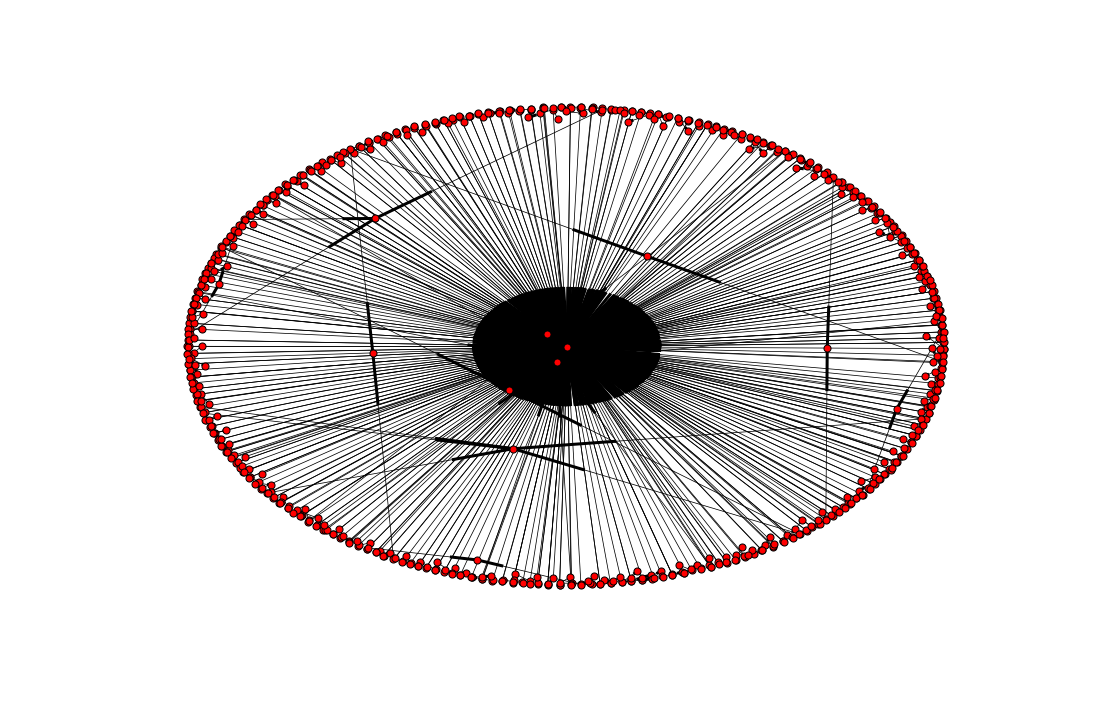

In [8]:

%matplotlib inline
import bz2, json
import matplotlib.pyplot as plt
# code for question.

# code for constructing the Directed Graph `DG`
# open the bzipped dataset
reader2 = bz2.BZ2File("./twitter-dump.json.bz2", mode="r")
#  construct the networkx graph
ReplyGraph = nx.DiGraph()

# go line by line (ergo, tweet by tweet)
for line in reader2:
    # load the JSON object from the read line
    jobj = json.loads(line.decode('utf-8'))
    
    # if the current tweet is a reply
    if u'in_reply_to_user_id' in jobj:
        # determine user id
        user_id = jobj[u'user'][u'id']
        if isinstance(user_id, dict):
            #user_id = user_id.values()[0]
            user_id = list(user_id.values())[0]
        user_id = int(user_id)
    
        # determine the replied user id   
        reply_user_id = jobj[u'in_reply_to_user_id']
        if reply_user_id is None:
            continue
        if isinstance(reply_user_id, dict):
            reply_user_id = list(reply_user_id.values())[0]
        reply_user_id = int(reply_user_id)
        
        # add the two nodes in the graph, if not already there
        if user_id not in ReplyGraph:  ReplyGraph.add_node(user_id)
        if reply_user_id not in ReplyGraph:  ReplyGraph.add_node(reply_user_id)
        ReplyGraph.add_edge(user_id, reply_user_id)
        


# determine the spring layout
pos = nx.spring_layout(ReplyGraph)

# draw the graph
plt.figure(figsize=(19,12))
plt.axis('off')
nx.draw_networkx_nodes(ReplyGraph, pos, node_size=50)
nx.draw_networkx_edges(ReplyGraph, pos, width=0.75, arrows=True)

**(1 point) Assignment question #2.2:** How many nodes and edges do you have in the resulted reply graph?

In [9]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
print ("Number of nodes: %d" %  ReplyGraph.number_of_nodes())
print ("Number of edges: %d" %  ReplyGraph.number_of_edges())

Number of nodes: 735
Number of edges: 622


**(1 point) Assignment question #2.3:** Using the `networkx` functions, filter the reply graph constructed at question #2.1 to its *giant connected component*. 
Calculate for this new graph: i) the number of nodes, ii) the number of edges, iii) the radius and iv) the diameter.  
**HINT:** You can either construct a new graph which contains only the nodes and edges in the *giant connected component* or you can remove from your initial graph all the nodes and edges belonging to the other connected components.  
**NOTE:** This question should be solved on the UNDIRECTED version of the social graph. Considering that *DG* is the constructed directed networkx graph, do:

In [10]:
# create an undirected copy of our graph
RG = ReplyGraph.to_undirected()

# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
largest_cc = nx.Graph()
largest_cc = max(nx.connected_component_subgraphs(RG), key=len)
print ("Number of nodes: %d" % largest_cc.number_of_nodes())
print ("Number of edges: %d" % largest_cc.number_of_edges())
print ("The radius of largest component graph: %d" %nx.radius(largest_cc))
print ("The diameter of largest component graph: %d" %nx.diameter(largest_cc))

Number of nodes: 465
Number of edges: 467
The radius of largest component graph: 3
The diameter of largest component graph: 6


**(1 point) Assignment question #2.4:** This assignment question is to calculate iterativelly the basic form of the PageRank on the reply social graph constructed previously. Considering that *DG* is the constructed directed networkx graph constructed at the **Assignment questions #2.1**. We will construct the *PageRank* on the largest [*weakly connected component*](http://en.wikipedia.org/wiki/Connectivity_%28graph_theory%29). This is constructed as shown hereafter.
Your job is to compute the PageRank, using the algorithm provided in the tutorial and exemplified in the lecture notes.
Use a maximum of $maxiter = 20$ iterations.

In [11]:
import operator
from itertools import islice

# get the list of weakly connected components, sorted by size
omp_List = sorted(nx.weakly_connected_component_subgraphs(ReplyGraph), key = len, reverse=True)

# we want the first component, the biggest
WCDG = omp_List[0]

# get the number of nodes of the graph
n = len(WCDG.nodes())

# initialize the PR at moment 0 using a dictionary of pairs {node : score}
PR = {}
for node in WCDG.nodes():
    PR[node] = 1.0/n

# initialize variables
no_iter=0     # current iteration
iter_max=20   # maximum number of iterations
d = 0.7      # decay factor

while no_iter < iter_max: # iterate until maximum iterations
    # at each iteration, we compute a new version of the PageRank for each node
    new_PR = {}
    no_iter = no_iter + 1

    # calculate the PageRank of each node (`new_PR[node]`), based on the previous values (`PR[other_nodes]`)
    for node in WCDG.nodes():
        ## code for calculating new_PR[node].
        #find all the ingoing nodes
        nei_processor = WCDG.in_edges(node)
        new_PR[node] = (1-d)/n
        for curr_processor in nei_processor:
            nb = WCDG.out_degree(curr_processor[0])
            new_PR[node]+= d*(PR[curr_processor[0]]/nb)
        # at the end of iteration, replace old values of PR with the new ones
    PR = new_PR
# even if a dictionary is not sorted (it is just a collection) we sort it so that the next
# printing at the screen shows some interesting values
sorted_PR = sorted(PR.items(), key=operator.itemgetter(1), reverse=True)
# and print it out the first 10 elements
list(islice(sorted_PR, 10))

[(34507480, 0.20229379652869947),
 (34359954, 0.004483870967741935),
 (153694176, 0.0026774193548387095),
 (336555582, 0.0010967741935483872),
 (271239188, 0.0009925558321466847),
 (1188471348, 0.0009925558321466847),
 (2502937470, 0.0009925558321466847),
 (261289587, 0.000870967741935484),
 (1456140289, 0.0006451612903225808),
 (217733121, 0.0006451612903225808)]

In [12]:
from itertools import islice

# compute the pagerank
pr = nx.pagerank(WCDG)

# even if a dictionary is not sorted (it is just a collection) we sort it so that the next
# printing at the screen to show some interesting values
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)

# and print it out the first 10 elements
list(islice(sorted_pr, 10))

[(34507480, 0.443107317409402),
 (34359954, 0.009568351538270254),
 (153694176, 0.005613240502475285),
 (336555582, 0.002152518346154687),
 (271239188, 0.0020236647946348593),
 (1188471348, 0.0020236647946348593),
 (2502937470, 0.0020236647946348593),
 (261289587, 0.0016581294666803159),
 (1456140289, 0.0011637405872059446),
 (217733121, 0.0011637405872059446)]

3. Assignment questions related to the tutorial 3: sentiment analysis
---

The following code is necessary to define the sentiment scoring function that was constructed in the tutorial. Run this before continuing with the assignments:

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

# define the lemmatizer
lmtzr = WordNetLemmatizer()

# read the positive and negative lexicon in lists of words
positive_words = [lmtzr.lemmatize(line.strip().decode('utf-8')) for line in open('sentiment-lexicon-positive-words.txt')]
negative_words = [lmtzr.lemmatize(line.strip().decode('utf-8')) for line in open('sentiment-lexicon-negative-words.txt')]

# define the function that computes the sentiment score
def get_sentiment_score(text):
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(text)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]

    # calculate the sentiment score
    score = 0
    for word in tweet:
        if word in positive_words:
                score = score + 1
        if word in negative_words:
                score -=1
    return score

**(1 point) Assignment question #3.1:** Use the `get_sentiment_score(text)`, the sentiment scoring function defined before, and calculate the sentiment polarity of the tweets in the Twitter JSON dataset used in [tutorial 2](http://nbviewer.ipython.org/url/rizoiu.eu/sna-lab-ipython/tutorial-2-construct-network-real-twitter-dump.ipynb). 
The dataset is [available to download here](http://rizoiu.eu/sna-lab-ipython/twitter-dump.json.bz2). 
Print the text of the 10 most positive and the 10 most negative tweets. 
We consider that a tweet $t_1$ is more positive than another tweet $t_2$ when score of the former is higher than the score of the latter ($score(t_1) > score(t_2)$). 
Similarly, a tweet $t_1$ is more negative than $t_2$ when $score(t_1) < score(t_2)$.  
**HINT:** Load the tweets one by one as seen in tutorial 2 and extract the text, which is found in the field *text* of each tweet.

In [15]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
# open the bzipped dataset
import bz2, json
import operator
from itertools import islice
reader = bz2.BZ2File("./twitter-dump.json.bz2", mode="r")
tweet_score = dict()
# go line by line (ergo, tweet by tweet)
for line in reader:
    # load the JSON object from the read line
    jobj = json.loads(line.decode('utf-8'))
    # determine user id
    user_id = jobj[u'user'][u'id']
    if isinstance(user_id, dict):
        user_id = list(user_id.values())[0]
    user_id = int(user_id)
    #determine the text in tweet
    tweet_text = jobj[u'text']
    score = get_sentiment_score(tweet_text)
    tweet_score[tweet_text]=score

tweet_nodup=list(set(tweet_score))
sorted_tweet_positive = sorted(tweet_score.iteritems(), key=operator.itemgetter(1), reverse=True)
# and print it out the first 10 elements

print("Top 10 most positive tweet!")
for i in range(10):
    print(sorted_tweet_positive[i])
    print("\n")
print("\nTop 10 most negative tweet!")
for i in range(10):
    print(sorted_tweet_positive[len(sorted_tweet_positive)-10+i])
    print("\n")
    

Top 10 most positive tweet!
(u'Watch @ArianaGrande and @iggyazalea Problem Official music video here \U0001f469\U0001f4ad\U0001f3ac http://t.co/hSpUIH9eK6 love love love love love love love \U0001f496\U0001f496\U0001f496\U0001f496\U0001f602', 6)


(u"RT @PerrieAndSmile: It's perfect, Amazing, fantastic, WOW!\U0001f49cI love u\U0001f495 http://t.co/dKDHDhdOgF\nPlease follow me gorgeous!\U0001f451@ArianaGrande \n#Watc\u2026", 6)


(u"It's perfect, Amazing, fantastic, WOW!\U0001f49cI love u\U0001f495 http://t.co/dKDHDhdOgF\nPlease follow me gorgeous!\U0001f451@ArianaGrande \n#WatchProblemOnVEVO x87", 6)


(u"It's perfect, Amazing, fantastic, WOW!\U0001f49cI love u\U0001f495 http://t.co/dKDHDhdOgF\nPlease follow me gorgeous!\U0001f451@ArianaGrande \n#WatchProblemOnVEVO x88", 6)


(u"It's perfect, Amazing, fantastic, WOW!\U0001f49cI love u\U0001f495 http://t.co/dKDHDhdOgF\nPlease follow me gorgeous!\U0001f451@ArianaGrande \n#WatchProblemOnVEVO x56", 6)


(u'RT @ArianaGrande: glad u love it.

**(1 point) Assignment question #3.2:** Based on the scores calculated in **Assignment #3.1**, determine the 3 most positive users. A user $u_1$ is more positive than a user $u_2$ if the dataset contains more positive tweets emitted by $u_1$ than tweets emitted by $u_2$. Formally:
$$ positivity(u_1) > positivity(u_2) \iff \left| \left\{ t \, \middle| \, author(t) = u_1 \wedge score(t) > 0 \right\} \right| > \left| \left\{ t \, \middle| \, author(t) = u_2 \wedge score(t) > 0 \right\} \right|$$

In [16]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
user_score={}
reader2 = bz2.BZ2File("./twitter-dump.json.bz2", mode="r")
# go line by line (ergo, tweet by tweet)
for line in reader2:
    # load the JSON object from the read line
    jobj = json.loads(line.decode('utf-8'))
    # determine user id
    user_id = jobj[u'user'][u'id']
    if isinstance(user_id, dict):
        user_id = list(user_id.values())[0]
    user_id = int(user_id)
    #determine the text in tweet
    tweet_text = jobj[u'text']
    curr_tweet_score = get_sentiment_score(tweet_text)
    if curr_tweet_score > 0:
        if user_id in user_score:
            user_score[user_id]+=1
        else:
            user_score[user_id] = 1
sorted_user = sorted(user_score.iteritems(), key=operator.itemgetter(1), reverse=True)
dict(islice(sorted_user, 3))

{1243188937: 28, 1601537689: 25, 2229663685: 22}

**(1 point) Assignment question #3.3:** 
We have discussed earlier that our system is fragile to negations: it will score the expression *not beautiful* as positive because it only detects the word beautiful as positive. 
More generally, we consider that the token **not** changes the polarity of a given token: **not beautiful** becomes negative, while **not bad** becomes positive.  
Modify the function `get_sentiment_score(text)` to detect the changes of polarity due to the token **not**.

In [17]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.
# define the function that computes the sentiment score
def get_sentiment_score_modify(text):
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(text)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]

    # calculate the sentiment score
    score = 0
    for word in tweet:
        curr_index = tweet.index(word)
        if word in positive_words:
            if tweet[curr_index-1] == "not":
                score -=1
            else:
                score = score + 1
        if word in negative_words:
            if tweet[curr_index-1] == "not":
                score +=1
            else:
                score -=1
    return score

In [18]:
#test of 3.3
pos_tweets = [ 'I love this cars',
'This view is amazing',
'I feel great this morning',
'I am so excited about the concert',
'He is my best friend']
neg_tweets = ['I do not like this car',
'This view is horrible',
'I feel tired this morning',
'I am not looking forward to the concert',
'He is my not worst enemy']
for words in pos_tweets + neg_tweets:
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(words)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]
    # print the tweet
    print (tweet)
for words in pos_tweets + neg_tweets:
    print ("Tweet: '{:s}', score: {:d}".format(words, get_sentiment_score(words)))
    print ("------------------------------------")

print ("------------------------------------")
for words in pos_tweets + neg_tweets:
    print ("Tweet: '{:s}', score: {:d}".format(words, get_sentiment_score_modify(words)))
    print ("------------------------------------")

['love', 'this', u'car']
['this', 'view', 'amazing']
['feel', 'great', 'this', 'morning']
['excited', 'about', 'the', 'concert']
['best', 'friend']
['not', 'like', 'this', 'car']
['this', 'view', 'horrible']
['feel', 'tired', 'this', 'morning']
['not', 'looking', 'forward', 'the', 'concert']
['not', 'worst', 'enemy']
Tweet: 'I love this cars', score: 1
------------------------------------
Tweet: 'This view is amazing', score: 1
------------------------------------
Tweet: 'I feel great this morning', score: 1
------------------------------------
Tweet: 'I am so excited about the concert', score: 1
------------------------------------
Tweet: 'He is my best friend', score: 1
------------------------------------
Tweet: 'I do not like this car', score: 1
------------------------------------
Tweet: 'This view is horrible', score: -1
------------------------------------
Tweet: 'I feel tired this morning', score: -1
------------------------------------
Tweet: 'I am not looking forward to the c

Bonus assignments questions
---
Bonus assignment questions earn you extra marks if you solve this assignment correctly, no penalty is inflicted if you do not solve it. 
Note that the total grade of SMA assignments cannot exceed 10 points, therefore the bonus point can only be used to compensate for another question which you did not solve correctly.

**(0.25 additional points) Bonus question #1.** 
Based on the scores calculated in **Assignment #3.1**, plot the temporal evolution of the counts of positive and negative tweets. The date a tweet was emitted is found in the field *created_at*. 
Divide the temporal extent of your dataset into 100 timeslices. 
The temporal extent of the dataset is from the creation date of the first tweet to the creation date of the last tweet. 
Count how many positive and how many negative tweets you have in each timeslice. 
Plot these counts on a graphic resembling this one:  
![caption](files/desired-plot.png)  
**HINT:** the graphic above is not based on real data. Your actual curves might **NOT** look like this one. Its purpose is just to show you the expected form of the graphic.

In [15]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.

**(0.25 additional points) Bonus question #2: Polarized communities** We want to know if there are polarized communities in our social graph. Are there closely linked groups of users who have similar sentiment polarities? We calculate the sentiment polarity of a user as the numbre of positive tweets emitted, from which we substract the number of negative tweets. Formally:
$$sentiment\_polarity(u) = \left| \left\{ t \, \middle| \, author(t) = u \wedge score(t) > 0 \right\} \right| - \left| \left\{ t \, \middle| \, author(t) = u \wedge score(t) < 0 \right\} \right| \enspace.$$  
To visually detect the polarized communities, we want to plot the same graph as in [tutorial 1](http://nbviewer.ipython.org/url/rizoiu.eu/sna-lab-ipython/tutorial-1-construct-social-graph.ipynb) at *Step 3*, but with the colors of nodes representing their polarity: `blue` for a negative polarity and `red` for a positive polarity. 
Are nodes colored similarly clustered close together?

In [16]:
# code or answer for question. In case of plain text answer, change the type of cell to "Raw Text" using the toolbar.